In [5]:
# For ndarray handling:
import numpy as np

# For plotting:
import matplotlib
import matplotlib.pyplot as plt

# For deep learning functionality
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D

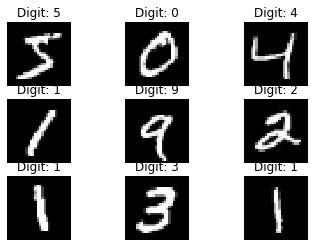

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Get the one-hot encoded labels
n_class = len(np.unique(y_train))
Y_train = np.eye(n_class)[y_train]
Y_test = np.eye(n_class)[y_test]

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(f'Digit: {y_train[i]}')
    plt.axis('off')

In [8]:
# Normalize the data to help with training
X_train_CNN = np.expand_dims(X_train, axis=-1)
X_test_CNN = np.expand_dims(X_test, axis=-1)
X_train_CNN = X_train_CNN.astype('float32')
X_test_CNN = X_test_CNN.astype('float32')
X_train_CNN /= 255
X_test_CNN /= 255

# Create the model using Sequential object
model = Sequential()

# Create the first hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(Conv2D(10, (5, 5), input_shape=(X_train_CNN.shape[1], X_train_CNN.shape[2], 1)))
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the next hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(MaxPool2D())
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the dense head layer
model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))

# Create the output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model ready for training
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_CNN, Y_train, epochs=15, validation_split=0.2)

Epoch 1/15
   6/1500 [..............................] - ETA: 15s - loss: 2.2627 - accuracy: 0.1354 

2022-04-15 01:08:05.093836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - ETA: 0s - loss: 0.2369 - accuracy: 0.9288

2022-04-15 01:08:20.236238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 17s 11ms/step - loss: 0.2369 - accuracy: 0.9288 - val_loss: 0.0982 - val_accuracy: 0.9734
Epoch 2/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0857 - accuracy: 0.9740 - val_loss: 0.0677 - val_accuracy: 0.9810
Epoch 3/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0636 - accuracy: 0.9792 - val_loss: 0.0628 - val_accuracy: 0.9817
Epoch 4/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0566 - val_accuracy: 0.9828
Epoch 5/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0430 - accuracy: 0.9861 - val_loss: 0.0497 - val_accuracy: 0.9849
Epoch 6/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0378 - accuracy: 0.9874 - val_loss: 0.0499 - val_accuracy: 0.9844
Epoch 7/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.0449 - val_accura

In [9]:
predicted_probability = model.predict(X_test_CNN)

predicted_classes = np.argmax(predicted_probability, axis=-1)

correct_preds = np.nonzero(predicted_classes == y_test)[0]
incorrect_preds = np.nonzero(predicted_classes != y_test)[0]
print(f'{len(correct_preds)} classified correctly')
print(f'{len(incorrect_preds)} classified incorrectly')
print(f'{len(correct_preds) / len(y_test) * 100}% of test set classified correctly')

2022-04-15 01:12:23.000260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9880 classified correctly
120 classified incorrectly
98.8% of test set classified correctly
